#**NHẬN DIỆN 10 MÓN ĂN VIỆT NAM DÙNG CNN**

**Load thư viện**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

**Liên kết drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Tạo tập train, validation và test**

In [3]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

**Gắn giá trị vào tập train, validation và test**

In [4]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Python/BTVN3/CNN_NHận diện 10 món ăn Việt Nam/Datasets/Train2',
                        target_size=(300, 300),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NHận diện 10 món ăn Việt Nam/Datasets/Validation2",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")
test_generator = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_NHận diện 10 món ăn Việt Nam/Datasets/Test2",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")

Found 334 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


**Xem nhãn các món ăn**

In [5]:
training_generator.class_indices

{'Bánh bao': 0,
 'Bánh mỳ': 1,
 'Bánh trưng': 2,
 'Bánh xèo': 3,
 'Bún bò Huế': 4,
 'Cá điêu hồng chiên xù': 5,
 'Cua rang me': 6,
 'Nem rán': 7,
 'Ngao hấp thái': 8,
 'Xôi gấc': 9}

**Tạo mô hình**

In [7]:
#CNN
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(300,300,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

**Chạy mô hình**

In [10]:
history = model.fit(training_generator,batch_size=20,epochs=50,verbose=1,validation_data=validation_generator)

Epoch 1/50
7/7 [==============================] - 213s 27s/step - loss: 21.5444 - accuracy: 0.1078 - val_loss: 2.3730 - val_accuracy: 0.1000
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 2.3073 - accuracy: 0.1287 - val_loss: 2.2612 - val_accuracy: 0.1200
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 2.1693 - accuracy: 0.1587 - val_loss: 2.1239 - val_accuracy: 0.4400
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 2.5550 - accuracy: 0.2575 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/50
7/7 [==============================] - 8s 1s/step - loss: 2.2528 - accuracy: 0.1617 - val_loss: 2.2280 - val_accuracy: 0.1800
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 2.1264 - accuracy: 0.2485 - val_loss: 1.9774 - val_accuracy: 0.2800
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 1.6970 - accuracy: 0.3743 - val_loss: 1.7613 - val_accuracy: 0.4600
Epoch 8/50
7/7 [=====================

**Lưu mô hình**

In [13]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienMonAnVN.h5')


**Tải mô hình**

In [14]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienMonAnVN.h5')

**Vẽ biểu đồ độ chính xác**

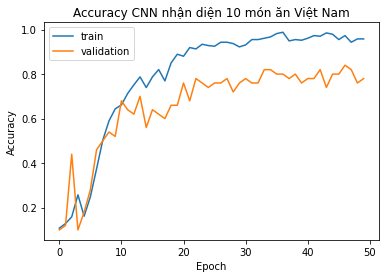

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN nhận diện 10 món ăn Việt Nam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Kiểm tra, dự đoán kết quả**

*Load thư viện*

In [16]:
#Load thư viện
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

*Kiểm tra tập test*

In [17]:
result=np.argmax(model.predict(test_generator),axis=1)
result

array([3, 8, 8, 0, 2, 9, 4, 7, 5, 6])

*Tải ảnh bên ngoài*

Đây là ngao hấp thái


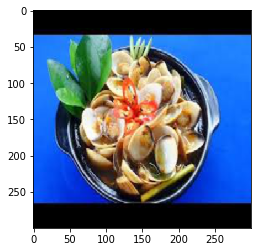

In [19]:
#Load ảnh lên
img=load_img('ngao.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là bánh bao")
elif result == 1:
    print("Đây là bánh mỳ")
elif result == 2:
    print("Đây là bánh trưng")
elif result == 3:
    print("Đây là bánh xèo")
elif result == 4:
    print("Đây là bún bò Huế")
elif result == 5:
    print("Đây là cá hồng chiên xù")
elif result == 6:
    print("Đây là cua rang me")
elif result == 7:
    print("Đây là nem rán")
elif result == 8:
    print("Đây là ngao hấp thái")
else:
    print("Đây là xôi gấc")




Đây là bánh bao


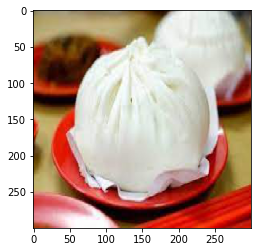

In [20]:
#Load ảnh lên
img=load_img('banhbao.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là bánh bao")
elif result == 1:
    print("Đây là bánh mỳ")
elif result == 2:
    print("Đây là bánh trưng")
elif result == 3:
    print("Đây là bánh xèo")
elif result == 4:
    print("Đây là bún bò Huế")
elif result == 5:
    print("Đây là cá hồng chiên xù")
elif result == 6:
    print("Đây là cua rang me")
elif result == 7:
    print("Đây là nem rán")
elif result == 8:
    print("Đây là ngao hấp thái")
else:
    print("Đây là xôi gấc")

Đây là bánh trưng


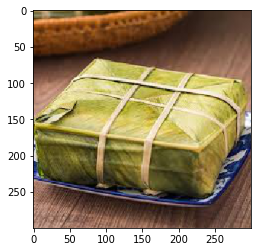

In [21]:
#Load ảnh lên
img=load_img('banhtrung.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là bánh bao")
elif result == 1:
    print("Đây là bánh mỳ")
elif result == 2:
    print("Đây là bánh trưng")
elif result == 3:
    print("Đây là bánh xèo")
elif result == 4:
    print("Đây là bún bò Huế")
elif result == 5:
    print("Đây là cá hồng chiên xù")
elif result == 6:
    print("Đây là cua rang me")
elif result == 7:
    print("Đây là nem rán")
elif result == 8:
    print("Đây là ngao hấp thái")
else:
    print("Đây là xôi gấc")

Đây là nem rán


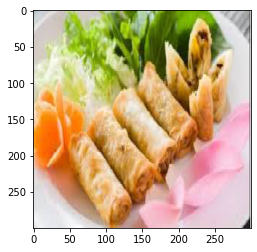

In [22]:
#Load ảnh lên
img=load_img('nemran.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là bánh bao")
elif result == 1:
    print("Đây là bánh mỳ")
elif result == 2:
    print("Đây là bánh trưng")
elif result == 3:
    print("Đây là bánh xèo")
elif result == 4:
    print("Đây là bún bò Huế")
elif result == 5:
    print("Đây là cá hồng chiên xù")
elif result == 6:
    print("Đây là cua rang me")
elif result == 7:
    print("Đây là nem rán")
elif result == 8:
    print("Đây là ngao hấp thái")
else:
    print("Đây là xôi gấc")

Đây là xôi gấc


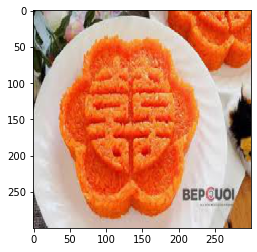

In [23]:
#Load ảnh lên
img=load_img('xoigac.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Đây là bánh bao")
elif result == 1:
    print("Đây là bánh mỳ")
elif result == 2:
    print("Đây là bánh trưng")
elif result == 3:
    print("Đây là bánh xèo")
elif result == 4:
    print("Đây là bún bò Huế")
elif result == 5:
    print("Đây là cá hồng chiên xù")
elif result == 6:
    print("Đây là cua rang me")
elif result == 7:
    print("Đây là nem rán")
elif result == 8:
    print("Đây là ngao hấp thái")
else:
    print("Đây là xôi gấc")